**1/ loading the data :**



In [ ]:
from keras.datasets import imdb #loading the package data from keras

In [ ]:
#  i wanna only keep 10K of the most frequently occuring words  while loading the data 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data,train_labels

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194, 1153, 194, 8255, 78, 22

In [ ]:
# Since we restricted ourselves to the top 10k frequent words, no word index should exceed 10000
# we'll verify this below

# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [ ]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**DATA PREPARTION :**


1.   Every index containing 0 is a word not present in the review, Every index corresponding to a word
2.   Every index with value 1, is a word that is present in the review and is denoted by its integer counterpart.



In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [ ]:
X_train
X_train.shape

(25000, 10000)

In [ ]:
 # vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [ ]:
# 3. Building the Neural Network

from tensorflow.keras.layers import Dense
# we will leverage hidden layers. We will define our layers as such.
Dense(16,activation ='relu')
# The argument being passed to each Dense layer, (16) is the number of hidden units of a layer.

In [ ]:
# 4.Model architecture

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

For our model, we will use :

 >>>Two intermediate layers with 16 hidden units each

>>>>Third layer that will output the scalar sentiment prediction

 >>>Intermediate layers will use the relu activation function. relu or Rectified linear unit function will zero out the negative values.
 
>>>>Sigmoid activation for the final layer or output layer. A sigmoid function “squashes” arbitrary values into the [0,1] range.

In [ ]:
 # 5. compiling the model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras import losses
from keras import metrics

In [ ]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
# setting up validation 

# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#6. training our model

history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5422 - accuracy: 0.7681 - val_loss: 0.4034 - val_accuracy: 0.8682
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3223 - accuracy: 0.8994 - val_loss: 0.3171 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2311 - accuracy: 0.9265 - val_loss: 0.2917 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1827 - accuracy: 0.9417 - val_loss: 0.2987 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1428 - accuracy: 0.9553 - val_loss: 0.2834 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1206 - accuracy: 0.9637 - val_loss: 0.2936 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1005 - accuracy: 0.9701 - val_loss: 0.3182 - val_accuracy: 0.8843
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

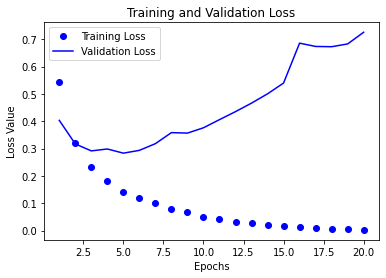

In [ ]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

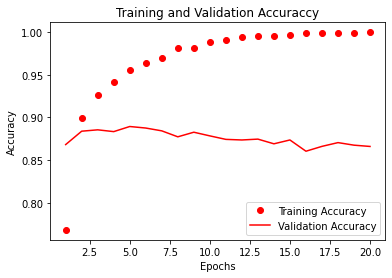

In [ ]:
# Training and Validation Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#retraining our model

model.fit(partial_X_train,
                   partial_y_train,
                   epochs=3,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 1s 42ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.7570 - val_accuracy: 0.8652
Epoch 2/3
30/30 [==============================] - 1s 33ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7947 - val_accuracy: 0.8651
Epoch 3/3
30/30 [==============================] - 1s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9477 - val_accuracy: 0.8448


In [ ]:
#model evaluation 
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)
result

array([[0.00310764],
       [1.        ],
       [0.06852406],
       ...,
       [0.00113255],
       [0.00131851],
       [0.12080052]], dtype=float32)

In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

In [ ]:
# Error
mae

0.17396

In [ ]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=4935292fa93660a7bd571c19862b399355bbc99e81b5d815a602e0ef11bb24f1
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="Binary Classification of Movie Reviews")